# meng 21200 project

### init

Import libraries

In [1097]:
%%capture
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### a

First, examine the $\frac{1}{1+e^{-a_Y(x-\theta_Y)}}$ term. For simplicity of notation, let us call this term $f_1(x)$, and the other constant term $f_2$. In other words, $f(x)=f_1(x)+f_2$

For $a_Y<0$:
As $x\rightarrow-\infty$, $e^{-a_Y(x-\theta_Y)} \rightarrow \infty$, so $f_1(x)\rightarrow 0$.
As $x\rightarrow\infty$, $e^{-a_Y(x-\theta_Y)} \rightarrow 0$, so $f_1(x)\rightarrow 1$.

For $a_Y>0$:
As $x\rightarrow-\infty$, $e^{-a_Y(x-\theta_Y)} \rightarrow \infty$, so $f_1(x)\rightarrow 0$.
As $x\rightarrow\infty$, $e^{-a_Y(x-\theta_Y)} \rightarrow 0$, so $f_1(x)\rightarrow -1$.

Therefore, we can conclude that the activation function is essentially a smoothed step function which gradually flattens out on both sides of the x-axis. Further examining $f_1$, note that $\theta_Y$ is a horizontal shift, the value of which represents the <u>x-coordinate of the center of the "step"</u>. We are also concerned about the steepness of the "step", so it is natural to take the derivative of $f(x)$:
$$f'(x)=a_Y\frac{e^{-a_Y(x-\theta_Y)}}{{(1+e^{-a_Y(x-\theta_Y)})}^2}$$
Hence, $a_Y$  determines the <u>steepness of the "step"</u>.


When $x=0$, $f_1(x)=f_2$, so $f(0)=0$
Therefore, we can conclude that $f_2$ exists to <u>ensure that the activation function passes through the origin</u>.


### b

(i)

Initialising constants for b(i)

In [1098]:
aE = 1.2
thetaE = 2.8
aI = 1
thetaI = 4
tau = 3
r = 1
wEE = 12
wEI = 4
wIE = 13
wII = 11
hE = 0
hI = 0
nE = 0
nI = 0

Defining activation function

In [1099]:
def fY(x, aY, theta):
    """
    :param x: state variable
    :param aY: determines slope at the "step"
    :param theta: location of the "step"
    :return: value of the activation function
    """
    return 1 / (1 + np.exp(-aY * (x - theta))) - 1 / (1 + np.exp(aY * theta))

Defining the RHS of the system of equations

In [1100]:
def sysEqn(t, arr):
    """
    :param t: time
    :param arr: ndarray of state variables; arr = [E, I]
    :return: RHS of the equations; sysEqn = [E', I']

    since variable names cannot contain apostrophes, an underscore will be used instead
    """

    E, I = arr
    E_ = 1 / tau * (-E + (1 - r * E) * fY(wEE * E  - wEI * I + hE + nE, aE, thetaE))
    I_ = 1 / tau * (-I + (1 - r * I) * fY(wIE * E  - wII * I + hI + nI, aI, thetaI))

    return [E_, I_]

In [1101]:
tInitial = 0
tFinal = 200
tList = np.linspace(tInitial, tFinal, 10000)

Case 1: E(0) = 0.3, I(0) = 0.2

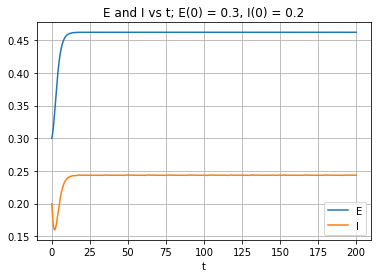

In [1102]:
E0 = 0.3
I0 = 0.2

bi1Soln = solve_ivp(sysEqn, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
Ei1List = bi1Soln.sol(tList)[0].T
Ii1List = bi1Soln.sol(tList)[1].T

plt.figure()
plt.plot(tList, Ei1List, label='E')
plt.plot(tList, Ii1List, label='I')
plt.title('E and I vs t; E(0) = 0.3, I(0) = 0.2')
plt.xlabel('t')
plt.grid()
plt.legend()

Case 2: E(0) = 0.2, I(0) = 0.2

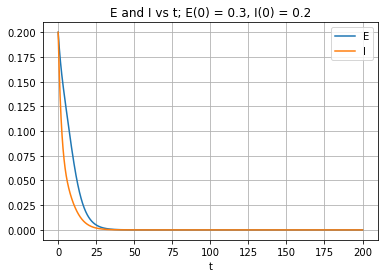

In [1103]:
E0 = 0.2
I0 = 0.2
bi2Soln = solve_ivp(sysEqn, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
Ei2List = bi2Soln.sol(tList)[0].T
Ii2List = bi2Soln.sol(tList)[1].T

plt.figure()
plt.plot(tList, Ei2List, label='E')
plt.plot(tList, Ii2List, label='I')
plt.title('E and I vs t; E(0) = 0.3, I(0) = 0.2')
plt.xlabel('t')
plt.grid()
plt.legend()

(ii)

Initialising constants for b(ii):

In [1104]:
aE = 1.3
thetaE = 4
aI = 2
thetaI = 3.7
tau = 8
r = 1
wEE = 16
wEI = 12
wIE = 15
wII = 3
hE = 1.25
hI = 0
nE = 0
nI = 0

Case 3: E(0) = 0, I(0) = 0

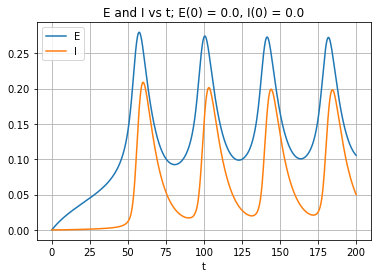

In [1105]:
E0 = 0
I0 = 0
biiSoln = solve_ivp(sysEqn, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
EiiList = biiSoln.sol(tList)[0].T
IiiList = biiSoln.sol(tList)[1].T

plt.figure()
plt.plot(tList, EiiList, label='E')
plt.plot(tList, IiiList, label='I')
plt.title('E and I vs t; E(0) = 0.0, I(0) = 0.0')
plt.xlabel('t')
plt.grid()
plt.legend()

From here onward, inhibited population activity and excitatory population activity, each as fractions of neurons active, will be abbreviated IPA and EPA respectively.

For Case 1, although IPA dipped initially, both EPA and IPA grew rapidly and reached steady state around t = 15ms. EPA reached around 46% at steady state, while IPA reached around 25%. Here, neuronal activity grew rapidly but quickly stabilised.

For Case 2, both EPA and IPA decreased rapidly, with IPA decreasing slightly faster. Both reached steady state of 0% of neurons active just past t = 25ms. Here, neuronal activity rapidly stopped.

For Case 3, EPA and IPA seem to begin oscillating from t = 50ms onwards, both with a period of approximately 40ms. EPA consistently has a higher value than IPA, and its peaks and troughs seem to be slightly ahead in time of that of IPA. EPA oscillates between approximately 10% and 27%, and IPA oscillates between approximately 2% and 20%. Here, neuronal activity seems to oscillate with relatively unchanging amplitude.

### c

(i)

Initialising constants for c(i)

In [1106]:
aE = 1.2
thetaE = 2.8
aI = 1
thetaI = 4
tau = 3
r = 1
wEE = 12
wEI = 4
wIE = 13
wII = 11
hE = 0
hI = 0
nE = 0
nI = 0

Create list of possible initial conditions for both E and I and initialise U and V as 2D lists

In [1107]:
length = 20
E0List = np.linspace(0, 1, length)
I0List = np.linspace(0, 1, length)

E_ = [[0 for j in range(length)] for i in range(length)]
I_ = [[0 for j in range(length)] for i in range(length)]
mag = [[0 for j in range(length)] for i in range(length)]

Iterate through each possible E0, I0 combination, and store derivatives in U and V respectively

In [1108]:
for i in range(len(E0List)):
    for j in range(len(I0List)):
        E0 = E0List[j]
        I0 = I0List[i]
        u = 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))
        v = 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))

        mag[i][j] = np.sqrt(u ** 2 + v ** 2)
        E_[i][j] = u
        I_[i][j] = v
        # dividing E_[i][j] and I_[i][j] by mag[i][j] here normalises the graph. Normalising the graph helps determine whether the fixed points are stable or not, but the graph as it is allows us to better visualise the locations of the fixed points.


Create quiver plot

Text(0, 0.5, 'I(0)')

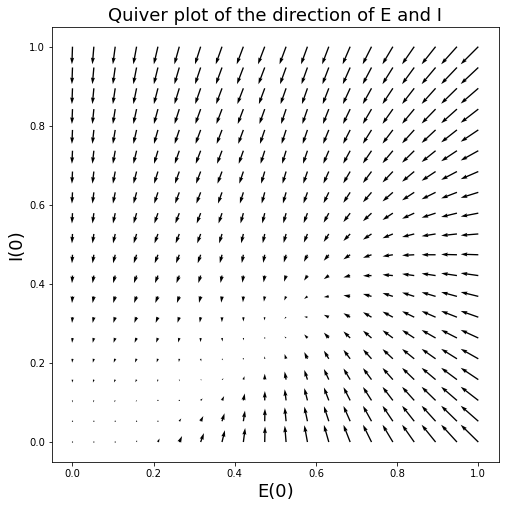

In [1109]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(E0List, I0List, E_, I_)
ax.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax.set_xlabel('E(0)', fontsize=18)
ax.set_ylabel('I(0)', fontsize=18)

(ii)

In [1110]:
def fE(I0):
    return 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))

def fI(I0):
    return 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))

Generate a list of E0 values, then set both E' and I' to zero for that E0 value, and use brentq to solve for I0 for each equation.

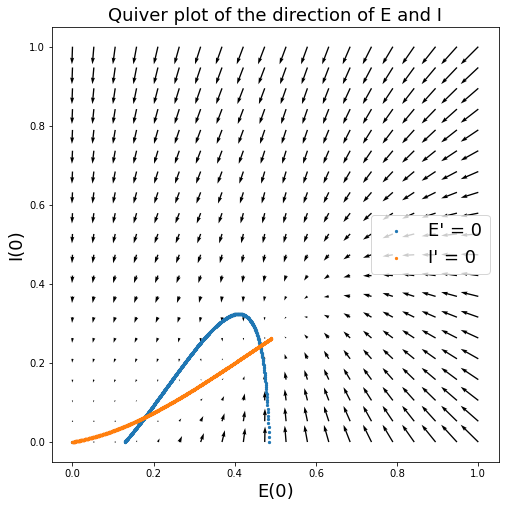

In [1111]:
EList = np.linspace(0, 0.49, 1000)
ECoordinateListfE = []
ECoordinateListfI = []
ICoordinateListfE = []
ICoordinateListfI = []
for i in EList:
    E0 = i
    try:
        rootfE = brentq(fE, 0, 1)
    except:
        pass
    else:
        ICoordinateListfE.append(rootfE)
        ECoordinateListfE.append(i)
    try:
        rootfI = brentq(fI, 0, 1)
    except:
        pass
    else:
        ICoordinateListfI.append(rootfI)
        ECoordinateListfI.append(i)

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.quiver(E0List, I0List, E_, I_)
ax1.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax1.set_xlabel('E(0)', fontsize=18)
ax1.set_ylabel('I(0)', fontsize=18)
ax1.scatter(ECoordinateListfE, ICoordinateListfE, s=5, label="E' = 0")
ax1.scatter(ECoordinateListfI, ICoordinateListfI, s=5, label="I' = 0")
ax1.legend(fontsize=18)

Note that although it is difficult to tell from the diagram, the two curves intersect at a third point $[0, 0]$. The blue curve dips below $0$ from $E(0) = 0$ to $E(0) = 0.12$.

Bonus

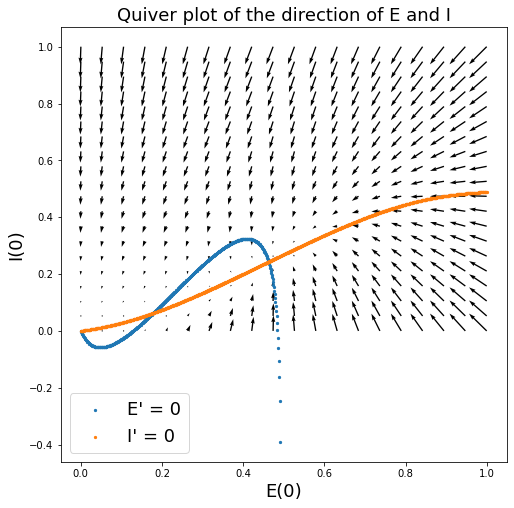

In [1112]:
EList = np.linspace(0, 1, 1000)
ECoordinateListfE = []
ECoordinateListfI = []
ICoordinateListfE = []
ICoordinateListfI = []
for i in EList:
    E0 = i
    try:
        rootfE = brentq(fE, -1, 1)
    except:
        pass
    else:
        ICoordinateListfE.append(rootfE)
        ECoordinateListfE.append(i)
    try:
        rootfI = brentq(fI, 0, 1)
    except:
        pass
    else:
        ICoordinateListfI.append(rootfI)
        ECoordinateListfI.append(i)

fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.quiver(E0List, I0List, E_, I_)
ax2.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax2.set_xlabel('E(0)', fontsize=18)
ax2.set_ylabel('I(0)', fontsize=18)
ax2.scatter(ECoordinateListfE, ICoordinateListfE, s=5, label="E' = 0")
ax2.scatter(ECoordinateListfI, ICoordinateListfI, s=5, label="I' = 0")
ax2.legend(fontsize=18)

By changing the max value we consider for $E(0)$ to $1$ and expanding the root finding function to the interval $[-1, 1]$, observe that at $E(0)$ values above some $maxE$, $I(0)$ values must be negative for $E'$ to equal $0$. The blue curve has an asymptote at this $maxE$.

To solve for maxE, we need to set $E'(0) = 0, I(0) = 0$ and solve for $E(0)$. The code below performs this task for an arbitrary set of parameters.

In [1113]:
# these parameters can be modified to solve maxE for arbitrary parameters
aE = 1.3
thetaE = 2.9
aI = 1
thetaI = 3.8
tau = 3
r = 0.9
wEE = 13
wEI = 3
wIE = 12
wII = 10
hE = 0
hI = 0
nE = 0
nI = 0

In [1114]:
def fe(E0):
    return 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))

I0 = 0
EList = np.linspace(0, 1, 20000)
for i in range(1, len(EList)):
    try:
        root = brentq(fe, EList[i - 1], EList[i])
    except:
        pass
    else:
        maxE = root

print(f'The maximum E value for these parameters is {round(maxE, 4)}')

The maximum E value for these parameters is 0.5181


(iii)

Revert to constants for b(i)

In [1115]:
aE = 1.2
thetaE = 2.8
aI = 1
thetaI = 4
tau = 3
r = 1
wEE = 12
wEI = 4
wIE = 13
wII = 11
hE = 0
hI = 0
nE = 0
nI = 0

Solve IVPs for 0 - 10000ms

In [1116]:
tcInitial = 0
tcFinal = 10000
tcList = np.linspace(tcInitial, tcFinal, 10000)
E0 = 0.3
I0 = 0.2
c1Soln = solve_ivp(sysEqn, [tcInitial, tcFinal], [E0, I0], method='RK45', dense_output=True)
Ec1List = c1Soln.sol(tList)[0].T
Ic1List = c1Soln.sol(tList)[1].T

E0 = 0.2
I0 = 0.2
c2Soln = solve_ivp(sysEqn, [tcInitial, tcFinal], [E0, I0], method='RK45', dense_output=True)
Ec2List = c2Soln.sol(tList)[0].T
Ic2List = c2Soln.sol(tList)[1].T

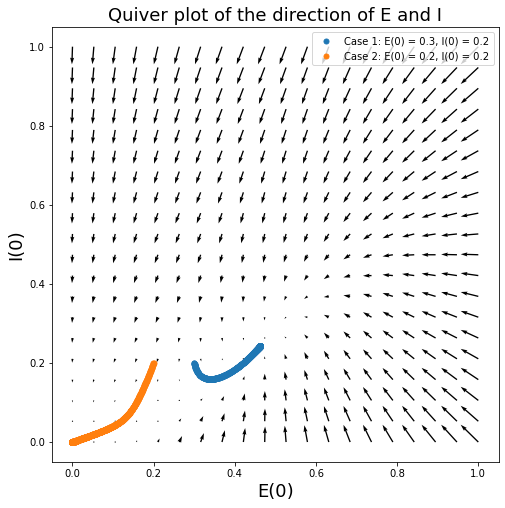

In [1117]:
fig3, ax3 = plt.subplots(figsize=(8, 8))
ax3.quiver(E0List, I0List, E_, I_)
ax3.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax3.set_xlabel('E(0)', fontsize=18)
ax3.set_ylabel('I(0)', fontsize=18)
ax3.scatter(Ec1List, Ic1List, s=25, label="Case 1: E(0) = 0.3, I(0) = 0.2")
ax3.scatter(Ec2List, Ic2List, s=25, label="Case 2: E(0) = 0.2, I(0) = 0.2")
ax3.legend()

Even 10000ms later, both cases still remained at their stable fixed points.

(iv)

In [1118]:
tol = 0.0005
count = 0
solnListE = []
solnListI = []
for i in range(len(ECoordinateListfE)):
    j = ECoordinateListfI.index(ECoordinateListfE[i])
    if abs(ICoordinateListfE[i] - ICoordinateListfI[j]) < tol:
        count += 1
        solnListE.append(ECoordinateListfE[i])
        solnListI.append(ICoordinateListfE[i])

        print(f'point {count}: [{round(ECoordinateListfE[i], 4)}, {round(ICoordinateListfE[i], 4)}]')

point 1: [0.0, 0.0]
point 2: [0.1782, 0.063]
point 3: [0.4625, 0.2434]


We can determine stability of fixed points by graphing how E and I change over time using initial conditions slightly off from the fixed points.

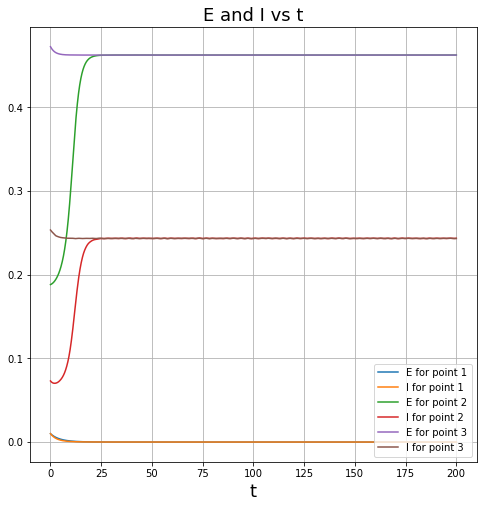

In [1119]:
shift = 0.01
fig4, ax4 = plt.subplots(figsize=(8, 8))
ax4.set_title('E and I vs t', fontsize=18)
ax4.set_xlabel('t', fontsize=18)

for i in range(count):
    E0 = solnListE[i] + shift
    I0 = solnListI[i] + shift
    bi1Soln = solve_ivp(sysEqn, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
    Ei1List = bi1Soln.sol(tList)[0].T
    Ii1List = bi1Soln.sol(tList)[1].T

    ax4.plot(tList, Ei1List, label=f'E for point {i + 1}')
    ax4.plot(tList, Ii1List, label=f'I for point {i + 1}')

ax4.grid()
ax4.legend(loc='lower right')

We can see that a 0.01 deviation in the positive E and I directions from point 1 and 3 eventually revert to the fixed points, while the same deviation moves further from point 2. Therefore, point 1 and 3 are stable, while point 2 is unstable.

(v)

In [1120]:
length = 500
E0List = np.linspace(0, 1, length)
I0List = np.linspace(0, 1, length)
mag = [[0 for j in range(length)] for i in range(length)]
for i in range(len(E0List)):
    for j in range(len(I0List)):
        E0 = E0List[i]
        I0 = I0List[j]
        u = 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))
        v = 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))

        mag[j][i] = np.sqrt(u ** 2 + v ** 2)


Text(0, 0.5, 'I(0)')

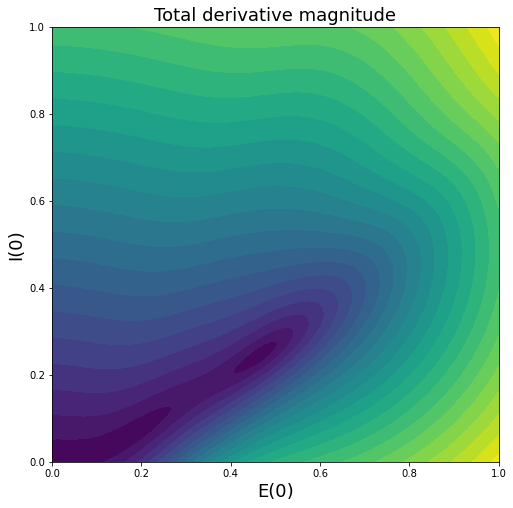

In [1121]:
fig5, ax5 = plt.subplots(figsize=(8, 8))
ax5.contourf(E0List, I0List, mag, levels=25)
ax5.set_title('Total derivative magnitude', fontsize=18)
ax5.set_xlabel('E(0)', fontsize=18)
ax5.set_ylabel('I(0)', fontsize=18)

Assuming that the system is set to light mode, the dark purple colour indicates where the total derivative is closest to 0, or the locatino of fixed points. These points are where neuron activity will converge to.

### d

Revert to constants for b(ii)

In [1122]:
aE = 1.3
thetaE = 4
aI = 2
thetaI = 3.7
tau = 8
r = 1
wEE = 16
wEI = 12
wIE = 15
wII = 3
hE = 1.25
hI = 0
nE = 0
nI = 0

Create list of possible initial conditions for both E and I and initialise U and V as 2D lists

In [1123]:
length = 20
E0List = np.linspace(0, 1, length)
I0List = np.linspace(0, 1, length)

E_ = [[0 for j in range(length)] for i in range(length)]
I_ = [[0 for j in range(length)] for i in range(length)]
mag = [[0 for j in range(length)] for i in range(length)]

Iterate through each possible E0, I0 combination, and store derivatives in U and V respectively

In [1124]:
for i in range(len(E0List)):
    for j in range(len(I0List)):
        E0 = E0List[j]
        I0 = I0List[i]
        u = 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))
        v = 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))
        mag[i][j] = np.sqrt(u ** 2 + v ** 2)

        E_[i][j] = u
        I_[i][j] = v

Create quiver plot

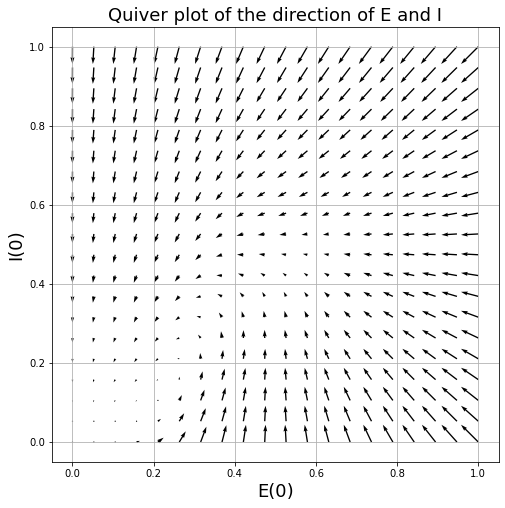

In [1125]:
fig_, ax_ = plt.subplots(figsize=(8, 8))
ax_.quiver(E0List, I0List, E_, I_)
ax_.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax_.set_xlabel('E(0)', fontsize=18)
ax_.set_ylabel('I(0)', fontsize=18)
ax_.grid()

In [1126]:
def fE(I0):
    return 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))

def fI(I0):
    return 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))

Generate a list of E0 values, then set both E' and I' to zero for that E0 value, and use brentq to solve for I0 for each equation.

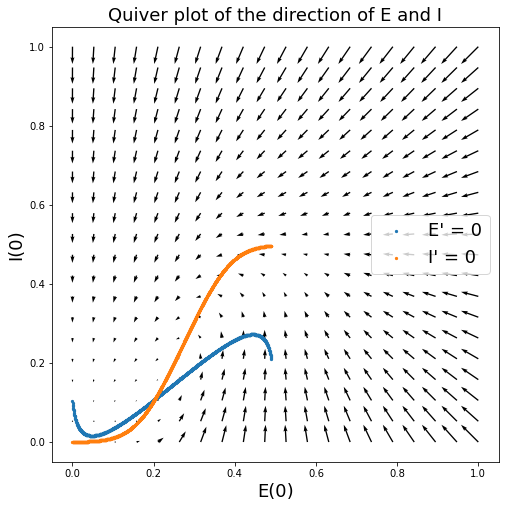

In [1127]:
EList = np.linspace(0, 0.49, 1000)
ECoordinateListfE = []
ECoordinateListfI = []
ICoordinateListfE = []
ICoordinateListfI = []
for i in EList:
    E0 = i
    try:
        rootfE = brentq(fE, 0, 1)
    except:
        pass
    else:
        ICoordinateListfE.append(rootfE)
        ECoordinateListfE.append(i)
    try:
        rootfI = brentq(fI, 0, 1)
    except:
        pass
    else:
        ICoordinateListfI.append(rootfI)
        ECoordinateListfI.append(i)

fig1_, ax1_ = plt.subplots(figsize=(8, 8))
ax1_.quiver(E0List, I0List, E_, I_)
ax1_.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax1_.set_xlabel('E(0)', fontsize=18)
ax1_.set_ylabel('I(0)', fontsize=18)
ax1_.scatter(ECoordinateListfE, ICoordinateListfE, s=5, label="E' = 0")
ax1_.scatter(ECoordinateListfI, ICoordinateListfI, s=5, label="I' = 0")
ax1_.legend(fontsize=18)

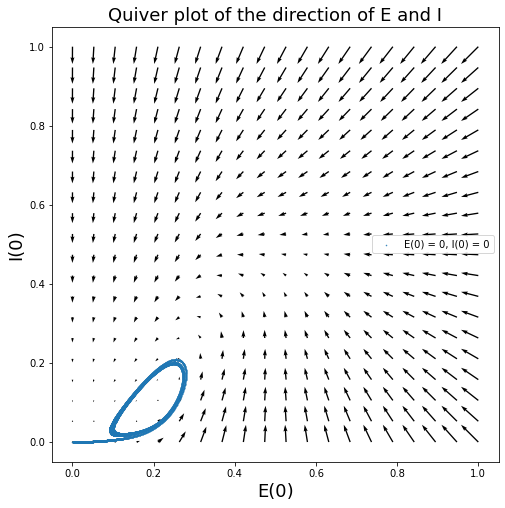

In [1128]:
fig2_, ax2_ = plt.subplots(figsize=(8, 8))
ax2_.quiver(E0List, I0List, E_, I_)
ax2_.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax2_.set_xlabel('E(0)', fontsize=18)
ax2_.set_ylabel('I(0)', fontsize=18)
ax2_.scatter(EiiList, IiiList, s=0.25, label="E(0) = 0, I(0) = 0")
ax2_.legend()

Solve for the coordinates of the fixed point

In [1129]:
tol = 0.0002
count = 0
solnListE = []
solnListI = []
for i in range(len(ECoordinateListfE)):
    j = ECoordinateListfI.index(ECoordinateListfE[i])
    if abs(ICoordinateListfE[i] - ICoordinateListfI[j]) < tol:
        count += 1
        solnListE.append(ECoordinateListfE[i])
        solnListI.append(ICoordinateListfE[i])
        print(f'point {count}: [{round(ECoordinateListfE[i], 4)}, {round(ICoordinateListfE[i], 4)}]')

point 1: [0.2026, 0.1081]


Determine stability

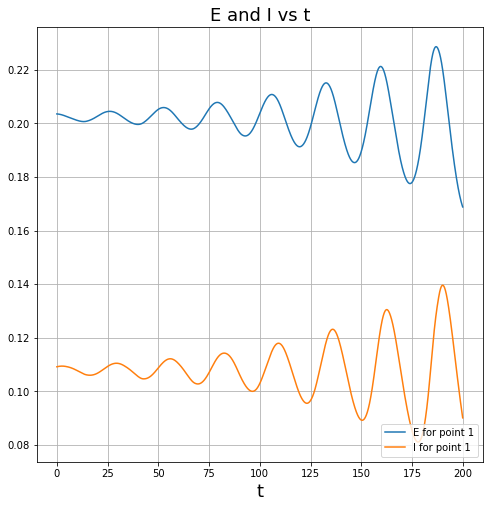

In [1130]:
shift = 0.001
fig4_, ax4_ = plt.subplots(figsize=(8, 8))
ax4_.set_title('E and I vs t', fontsize=18)
ax4_.set_xlabel('t', fontsize=18)

for i in range(count):
    E0 = solnListE[i] + shift
    I0 = solnListI[i] + shift
    bi1Soln = solve_ivp(sysEqn, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
    Ei1List = bi1Soln.sol(tList)[0].T
    Ii1List = bi1Soln.sol(tList)[1].T

    ax4_.plot(tList, Ei1List, label=f'E for point {i + 1}')
    ax4_.plot(tList, Ii1List, label=f'I for point {i + 1}')

ax4_.grid()
ax4_.legend(loc='lower right')

Discussion

part (c) quiver plot:

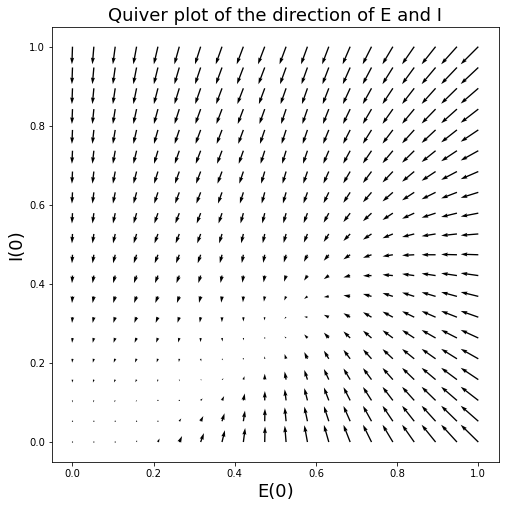

In [1131]:
fig

part (d) quiver plot:

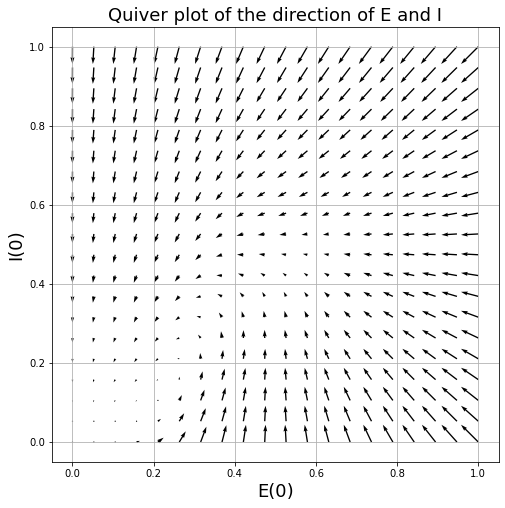

In [1132]:
fig_

As shown in the graphs above, the quiver plots for the sets of parameters look similar: if we imagine splitting each plot in half with the trailing diagonal, the top left half largely points towards the top left corner, while the bottom right half largely points towards the bottom right corner. The bottom left corner of each graph sees shorter vectors, which means that initial conditions in these regions develop more slowly.

However, the vectors for the (d) graph are overall shorter, meaning that changes to neuron activity rates are slower. Furthermore, there are some small differences in the direction of the vectors in the bottom left corner of each graph.

part (c) solution curves for $E' = 0$ and $I' = 0$:

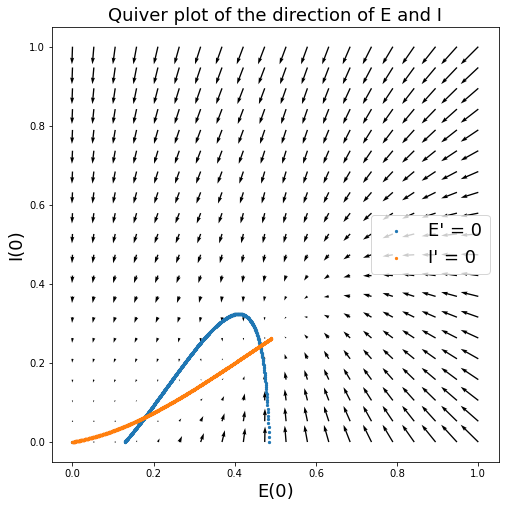

In [1133]:
fig1

part (d) solution curves for $E' = 0$ and $I' = 0$:

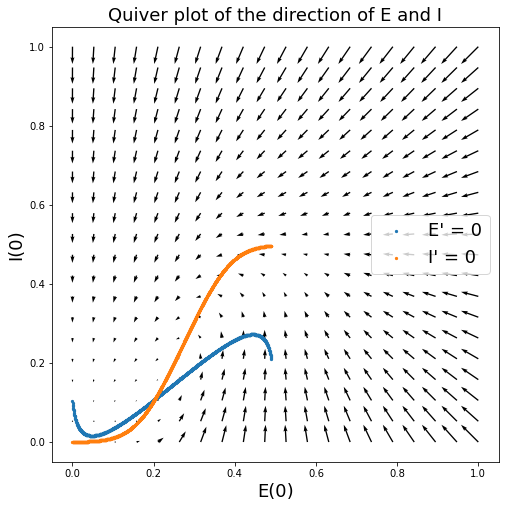

In [1134]:
fig1_

As shown in the graphs above, both solution curves start from the bottom left and move towards the top right and approach an asymptote around E(0) = 0.5. However, the two curves intersect at three points for (c) but only one point for (d), which means that (d) only has one fixed point.

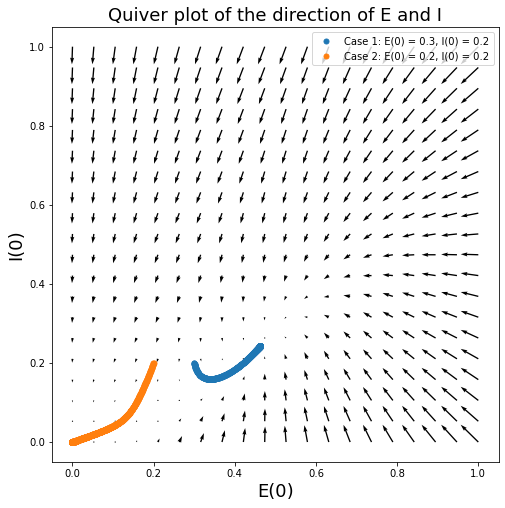

In [1135]:
fig3

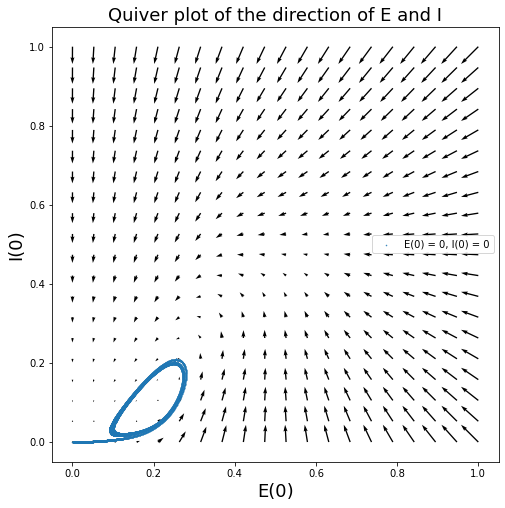

In [1136]:
fig2_

As shown in the graphs above, the initial conditions and parameters for (c) eventually led to steady state at two of the three fixed points, while the initial condition and parameters for (d) seemed to go around a loop.

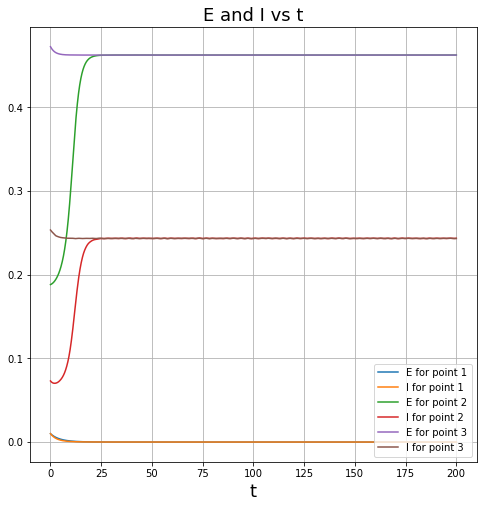

In [1137]:
fig4

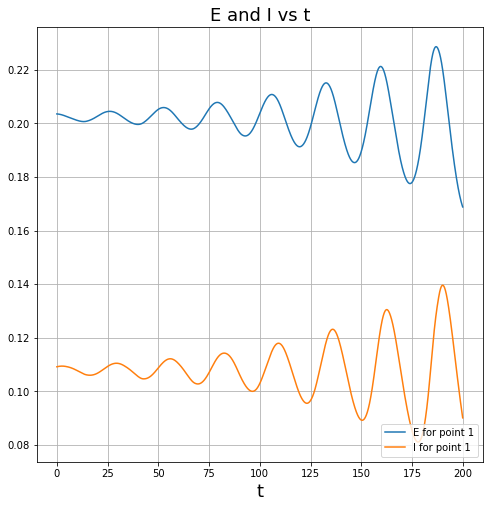

In [1138]:
fig4_

As shown in the graphs above, two of the three fixed points for (c) are stable, and a small deviation from them will eventually decay; on the other hand, the fixed point for (d) is unstable, and a small deviation oscillates with growing amplitude.

### e

(i)

Initialising constants for e(i)

In [1139]:
aE = 1.2
thetaE = 2.8
aI = 1
thetaI = 4
tau = 3
r = 1
wEE = 12
wEI = 4
wIE = 13
wII = 11
hE = 0
hI = 0
nE = 0
nI = 0

In [1140]:
tInitial = 0
tFinal = 200
tList = np.linspace(tInitial, tFinal, 1000)

In [1141]:
def sysEqnNoisy(t, arr):
    """
    :param t: time
    :param arr: ndarray of state variables; arr = [E, I]
    :return: RHS of the equations; sysEqn = [E', I']

    since variable names cannot contain apostrophes, an underscore will be used instead
    """

    nE = np.random.default_rng().normal(0, 1, 1)[0]
    nI = np.random.default_rng().normal(0, 1, 1)[0]

    E, I = arr
    E_ = 1 / tau * (-E + (1 - r * E) * fY(wEE * E  - wEI * I + hE + nE, aE, thetaE))
    I_ = 1 / tau * (-I + (1 - r * I) * fY(wIE * E  - wII * I + hI + nI, aI, thetaI))

    return [E_, I_]

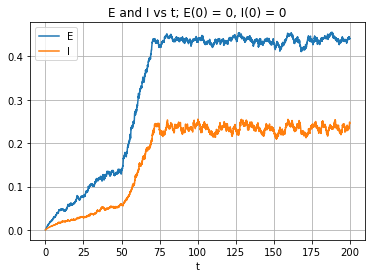

In [1142]:
E0 = 0
I0 = 0
Soln = solve_ivp(sysEqnNoisy, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
EList = Soln.sol(tList)[0].T
IList = Soln.sol(tList)[1].T

plt.figure()
plt.plot(tList, EList, label='E')
plt.plot(tList, IList, label='I')
plt.title(f'E and I vs t; E(0) = {E0}, I(0) = {I0}')
plt.xlabel('t')
plt.grid()
plt.legend()

In the absence of noise, E = 0 and I = 0 is a fixed point with the parameters in b(i), so the system should remain at (0, 0).


In the presence of noise, the behaviour of the system does differ. Instead of staying fixed at (0, 0), neuron activity generally grows. Out of the 10 runs I observed, the curves were slightly different between runs, but they all stabilised at around (0.45, 0.22), with random fluctuations due to the noise. This corresponds to one of the fixed points for the system in b(i).

(ii)

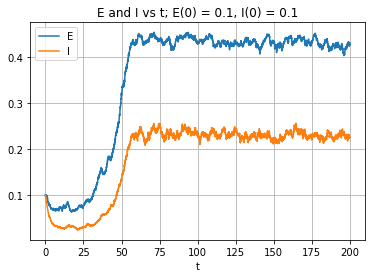

In [1162]:
E0 = 0.1
I0 = 0.1
Soln = solve_ivp(sysEqnNoisy, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
EList = Soln.sol(tList)[0].T
IList = Soln.sol(tList)[1].T

plt.figure()
plt.plot(tList, EList, label='E')
plt.plot(tList, IList, label='I')
plt.title(f'E and I vs t; E(0) = {E0}, I(0) = {I0}')
plt.xlabel('t')
plt.grid()
plt.legend()

In the absence of noise, a system with initial conditions (0.1, 0.1) and the parameters from b(i) should see neuron activity decay rapidly and reach steady state at (0, 0). This can be seen from the normalised quiver plot.

In the presence of noise, the behaviour of the system is similar to that in e(i): the system stabilised at (0.45, 0.22), with random fluctuations due to the noise.

(iii)

Yes, it is converging to a specific state: namely, fixed point 3: [0.4625, 0.2434] for the system in b(i).

For parts (iv) - (vi), assume that we are using initial conditions (0.1, 0.1)

(iv)

Critical point 1: take minimum E and I values, and average corresponding times
Critical point 2: differentiate using finite difference, then "smooth" the derivative using a moving average; take max "smoothed" gradient for E and I, and average corresponding times

Note that the value of numRuns drastically changes how long it takes to execute the code; each run takes around 4 seconds

In [1146]:
length = 1000
tInitial = 0
tFinal = 200
tList = np.linspace(tInitial, tFinal, length)

100 runs

In [1215]:
E0 = 0.1
I0 = 0.1

numRuns = 100
point1t, point1E, point1I = [[] for i in range(3)]
point2t, point2E, point2I = [[] for i in range(3)]

for n in range(numRuns):
    Soln = solve_ivp(sysEqnNoisy, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
    EList = list(Soln.sol(tList)[0].T)
    IList = list(Soln.sol(tList)[1].T)

    # critical point 1
    minELoc = EList.index(min(EList))
    minILoc = IList.index(min(IList))

    point1E.append(min(EList))
    point1I.append(min(IList))
    point1t.append((tList[minELoc] + tList[minILoc]) / 2)

    # critical point 2
    dEList = [(-EList[i + 1] + 4 * EList[i] - 3 * EList[i - 1]) / (2 * (200 / length)) for i in range(1, len(EList) - 1)]
    dIList = [(-IList[i + 1] + 4 * IList[i] - 3 * IList[i - 1]) / (2 * (200 / length)) for i in range(1, len(IList) - 1)]
    window = 100
    dEListMA = pd.DataFrame(dEList).rolling(window).mean().fillna(0)[0].values.tolist()
    dIListMA = pd.DataFrame(dIList).rolling(window).mean().fillna(0)[0].values.tolist()

    maxdELoc = dEListMA.index(max(dEListMA))
    maxdILoc = dIListMA.index(max(dIListMA))

    point2E.append(max(dEListMA))
    point2I.append(max(dIListMA))
    point2t.append((tList[maxdELoc] + tList[maxdILoc]) / 2)


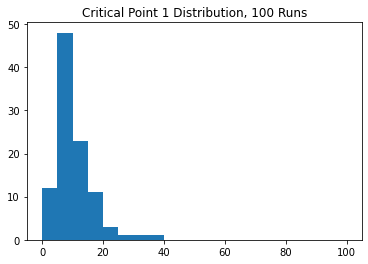

In [1227]:
plt.hist(point1t, bins=20, range=(0, 100))
plt.title(f"Critical Point 1 Distribution, {numRuns} Runs")
plt.xlabel('t')
plt.show()

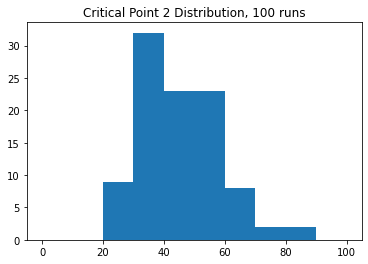

In [1226]:
plt.hist(point2t, bins=10, range=(0, 100))
plt.title(f"Critical Point 2 Distribution, {numRuns} runs")
plt.xlabel('t')
plt.show()

500 runs

In [1258]:
E0 = 0.1
I0 = 0.1

numRuns = 250
point1t, point1E, point1I = [[] for i in range(3)]
point2t, point2E, point2I = [[] for i in range(3)]

for n in range(numRuns):
    Soln = solve_ivp(sysEqnNoisy, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
    EList = list(Soln.sol(tList)[0].T)
    IList = list(Soln.sol(tList)[1].T)

    # critical point 1
    minELoc = EList.index(min(EList))
    minILoc = IList.index(min(IList))

    point1E.append(min(EList))
    point1I.append(min(IList))
    point1t.append((tList[minELoc] + tList[minILoc]) / 2)

    # critical point 2
    dEList = [(-EList[i + 1] + 4 * EList[i] - 3 * EList[i - 1]) / (2 * (200 / length)) for i in range(1, len(EList) - 1)]
    dIList = [(-IList[i + 1] + 4 * IList[i] - 3 * IList[i - 1]) / (2 * (200 / length)) for i in range(1, len(IList) - 1)]
    window = 100
    dEListMA = pd.DataFrame(dEList).rolling(window).mean().fillna(0)[0].values.tolist()
    dIListMA = pd.DataFrame(dIList).rolling(window).mean().fillna(0)[0].values.tolist()

    maxdELoc = dEListMA.index(max(dEListMA))
    maxdILoc = dIListMA.index(max(dIListMA))

    point2E.append(EList[maxdELoc])
    point2I.append(IList[maxdILoc])
    point2t.append((tList[maxdELoc] + tList[maxdILoc]) / 2)

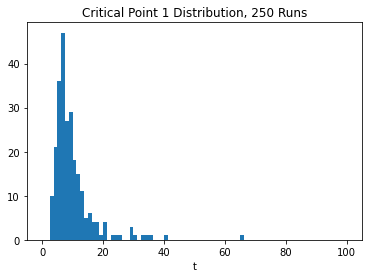

In [1268]:
plt.hist(point1t, bins=80, range=(0, 100))
plt.title(f"Critical Point 1 Distribution, {numRuns} Runs")
plt.xlabel('t')
plt.show()

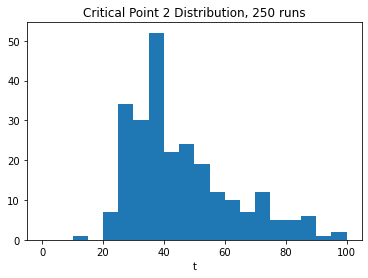

In [1266]:
plt.hist(point2t, bins=20, range=(0, 100))
plt.title(f"Critical Point 2 Distribution, {numRuns} runs")
plt.xlabel('t')
plt.show()

Both distributions are right skewed, and the shapes are overall similar. The distribution for critical point 2 seems to be less concentrated and have lower peaks.

(v)

Create normalised quiver plot and scatter plots of the critical points:

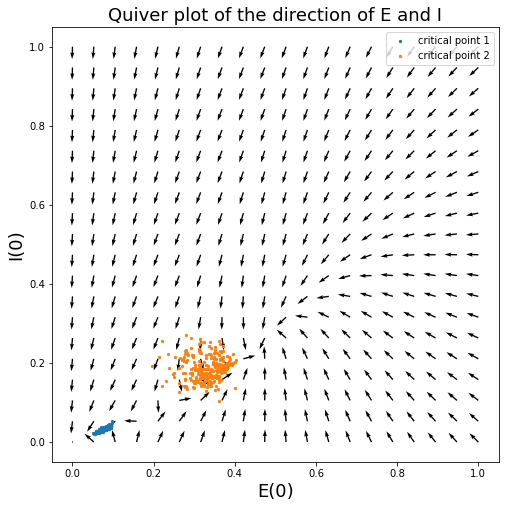

In [1269]:
length = 20
E0List = np.linspace(0, 1, length)
I0List = np.linspace(0, 1, length)

E_ = [[0 for j in range(length)] for i in range(length)]
I_ = [[0 for j in range(length)] for i in range(length)]
mag = [[0 for j in range(length)] for i in range(length)]

for i in range(len(E0List)):
    for j in range(len(I0List)):
        E0 = E0List[j]
        I0 = I0List[i]
        u = 1 / tau * (-E0 + (1 - r * E0) * fY(wEE * E0  - wEI * I0 + hE + nE, aE, thetaE))
        v = 1 / tau * (-I0 + (1 - r * I0) * fY(wIE * E0  - wII * I0 + hI + nI, aI, thetaI))

        mag[i][j] = np.sqrt(u ** 2 + v ** 2)
        if mag[i][j] == 0:
            E_[i][j] = u
            I_[i][j] = v
        else:
            E_[i][j] = u / mag[i][j]
            I_[i][j] = v / mag[i][j]
        # Dividing E_[i][j] and I_[i][j] by mag[i][j] here normalises the graph. Normalising the graph helps determine whether the fixed points are stable or not, but the graph as it is allows us to better visualise the locations of the fixed points.

fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(E0List, I0List, E_, I_)
ax.set_title('Quiver plot of the direction of E and I', fontsize=18)
ax.set_xlabel('E(0)', fontsize=18)
ax.set_ylabel('I(0)', fontsize=18)

ax.scatter(point1E, point1I, s=5, label='critical point 1')
ax.scatter(point2E, point2I, s=5, label='critical point 2')
ax.legend()

The position of the cluster for critical point 1 could have been predicted. Starting from (0.1, 0.1) and following the arrows, you would move towards the bottom left, before encountering upwards arrows, which would change the downward trend to an upward trend.

The position of the cluster for critical point 2 could have also been predicted. Arrows in this region point towards the top-right, which represents high rates of increase for both E and I.

(vi)

In [1270]:
def sysEqnLessNoisy(t, arr):
    """
    :param t: time
    :param arr: ndarray of state variables; arr = [E, I]
    :return: RHS of the equations; sysEqn = [E', I']

    since variable names cannot contain apostrophes, an underscore will be used instead
    using a standard deviation of 0.75 would allow us to better visualise the effects of the change
    """

    nE = np.random.default_rng().normal(0, 0.75, 1)[0]
    nI = np.random.default_rng().normal(0, 0.75, 1)[0]

    E, I = arr
    E_ = 1 / tau * (-E + (1 - r * E) * fY(wEE * E  - wEI * I + hE + nE, aE, thetaE))
    I_ = 1 / tau * (-I + (1 - r * I) * fY(wIE * E  - wII * I + hI + nI, aI, thetaI))

    return [E_, I_]

In [1271]:
E0 = 0.1
I0 = 0.1

numRuns = 100
point1t, point1E, point1I = [[] for i in range(3)]
point2t, point2E, point2I = [[] for i in range(3)]

for n in range(numRuns):
    Soln = solve_ivp(sysEqnLessNoisy, [tInitial, tFinal], [E0, I0], method='RK45', dense_output=True)
    EList = list(Soln.sol(tList)[0].T)
    IList = list(Soln.sol(tList)[1].T)

    # critical point 1
    minELoc = EList.index(min(EList))
    minILoc = IList.index(min(IList))

    point1E.append(min(EList))
    point1I.append(min(IList))
    point1t.append((tList[minELoc] + tList[minILoc]) / 2)

    # critical point 2
    dEList = [(-EList[i + 1] + 4 * EList[i] - 3 * EList[i - 1]) / (2 * (200 / length)) for i in range(1, len(EList) - 1)]
    dIList = [(-IList[i + 1] + 4 * IList[i] - 3 * IList[i - 1]) / (2 * (200 / length)) for i in range(1, len(IList) - 1)]
    window = 100
    dEListMA = pd.DataFrame(dEList).rolling(window).mean().fillna(0)[0].values.tolist()
    dIListMA = pd.DataFrame(dIList).rolling(window).mean().fillna(0)[0].values.tolist()

    maxdELoc = dEListMA.index(max(dEListMA))
    maxdILoc = dIListMA.index(max(dIListMA))

    point2E.append(max(dEListMA))
    point2I.append(max(dIListMA))
    point2t.append((tList[maxdELoc] + tList[maxdILoc]) / 2)


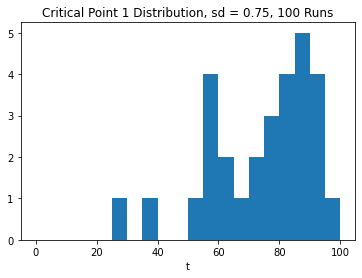

In [1278]:
plt.hist(point1t, bins=20, range=(0, 100))
plt.title(f"Critical Point 1 Distribution, sd = 0.75, {numRuns} Runs")
plt.xlabel('t')
plt.show()

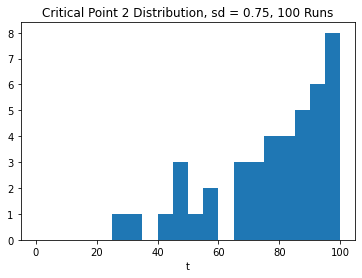

In [1275]:
plt.hist(point2t, bins=20, range=(0, 100))
plt.title(f"Critical Point 2 Distribution, sd = 0.75, {numRuns} Runs")
plt.xlabel('t')
plt.show()

With a smaller standard deviation, the noise would be closer to 0. Since noise is what drives the initial conditions of (0.1, 0.1) from decaying to (0, 0), lower magnitude of noise would mean that the process of reaching one of the other fixed points takes longer. Therefore, I would expect the distribution to shift towards a left skew.

The distributions produced from simulations show a left skew, and support my prediction.